Loss: 0.7237329700831349 LS:0.5
Loss: 0.6927436348237273 LS:0.5
Loss: 0.5302856736305587 LS:0.5
Loss: 0.40037188208022295 LS:0.5
Loss: 0.2070426751279524 LS:0.5
Loss: 0.08366620137744381 LS:0.5
Loss: 0.05929111826165648 LS:0.5
Loss: 0.033717285564688323 LS:0.5
Loss: 0.022942606683027427 LS:0.5
Loss: 0.01981590325446108 LS:0.5
Loss: 0.014455723599885307 LS:0.5
Loss: 0.01640354433259456 LS:0.5
Loss: 0.012303455054222695 LS:0.5
Loss: 0.00966483588740292 LS:0.5
Loss: 0.008013038432182496 LS:0.5
Loss: 0.008001950134065076 LS:0.5
Loss: 0.007819240988891264 LS:0.5
Loss: 0.006441358920602711 LS:0.5
Loss: 0.0051462682262477695 LS:0.5
Loss: 0.0050760554908995245 LS:0.5
Loss: 0.0042886813462140756 LS:0.5
Loss: 0.00488478939707116 LS:0.5
Loss: 0.0038407842869677133 LS:0.5
Loss: 0.004104335344596515 LS:0.5
Loss: 0.0031689745913388036 LS:0.5
Loss: 0.003118309768851364 LS:0.05
Loss: 0.0036586530591586875 LS:0.05
Loss: 0.0029104910809572664 LS:0.05
Loss: 0.003367759865273141 LS:0.05
Loss: 0.0032498488

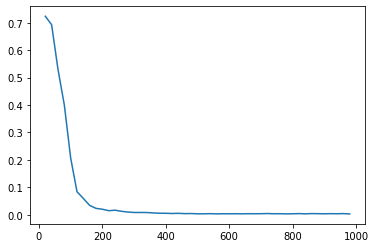

In [ ]:
import numpy as np
from matplotlib.pyplot import plot, show


def generate_input(input_neurons, output_neurons):
    num = np.random.randint(256)
    bits = np.binary_repr(num, input_neurons)
    sol = np.zeros((output_neurons, 1))
    sol[num % 4] = 1
    arr = np.empty((input_neurons, 1))
    for i in range(input_neurons):
        b = int(bits[i])
        arr[i] = b
    return arr, sol


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def der_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


def forward(weights, bias, lay):
    num = len(weights)
    layers_raw = np.empty(num, dtype = np.ndarray)
    layers = np.empty(num + 1, dtype = np.ndarray)
    for i in range(num):
        layers[i] = lay
        output = weights[i] @ lay + bias[i]
        layers_raw[i] = output
        lay = np.maximum(output, 0)
    layers[-1] = sigmoid(output)
    return layers, layers_raw


def backpropagation(bias_gradient, weight_gradient, layers, layers_raw, weights, cost):
    # first backpropagation is special since use a different activation function
    tmp_bias = cost * der_sigmoid(layers_raw[-1])
    bias_gradient[-1] -= tmp_bias
    weight_gradient[-1] -= tmp_bias @ layers[-2].T
    cost = weights[-1].T @ tmp_bias
    for i in range(2, len(weights)):
        tmp_bias = cost * np.heaviside(layers_raw[-i], 0)
        bias_gradient[-i] -= tmp_bias
        weight_gradient[-i] -= tmp_bias @ layers[-i - 1].T
        cost = weights[-i].T @ tmp_bias

    tmp_bias = cost * np.heaviside(layers_raw[0], 0)
    bias_gradient[0] -= tmp_bias
    weight_gradient[0] -= tmp_bias @ layers[0].T


def validation(weights, bias, num_input, num_output):
    found = 0
    for n in range(val_num):
        in_layer, sol = generate_input(num_input, num_output)
        output, _ = forward(weights, bias, in_layer)
        if ((output[-1] > 0.6) == (sol > 0.6)).all():
            found += 1
    print(found / val_num)


def neural_network(num_neurons: list):
    global learning_rate
    num_layers = len(num_neurons)
    if num_layers < 2:
        print("Non hai specificato abbastanza layer di neuroni")
        exit(-1)
    bias = np.empty(num_layers - 1, dtype = np.ndarray)
    weights = np.empty(num_layers - 1, dtype = np.ndarray)
    bias_gradient = np.empty(num_layers - 1, dtype = np.ndarray)
    weights_gradient = np.empty(num_layers - 1, dtype = np.ndarray)
    for i in range(num_layers - 1):
        bias[i] = (np.zeros((num_neurons[i+1], 1)))
        weights[i] = (np.random.rand(num_neurons[i+1], num_neurons[i]))
        bias_gradient[i] = (np.zeros((num_neurons[i+1], 1)))
        weights_gradient[i] = (np.random.rand(num_neurons[i+1], num_neurons[i]))

    for k in range(num_epoch):
        loss = 0
        bias_gradient = bias_gradient * 0
        weights_gradient = weights_gradient * 0
        for i in range(batch_size):
            inp, sol = generate_input(num_neurons[0], num_neurons[-1])
            layers, layers_raw = forward(weights, bias, inp)
            output = layers[-1]
            loss += np.square(output - sol).sum()

            # detras propagar
            backpropagation(bias_gradient, weights_gradient, layers, layers_raw, weights, (output - sol) * 2)

        bias += learning_rate * bias_gradient / batch_size
        weights += learning_rate * weights_gradient / batch_size

        if k % 20 == 0 and k != 0:
            loss = loss / batch_size
            history.append(loss)
            print(f'Loss: {loss} LS:{learning_rate}')
        if k % descend_step == 0 and k != 0:
            learning_rate /= 10
    return weights, bias


if __name__ == '__main__':
    num_epoch = 1000
    batch_size = 64
    learning_rate = 0.5
    descend_step = numEpoch // 2
    val_num = 1000
    history = []
    network = [8, 4, 4]
    weights, bias = neural_network(network)
    validation(weights, bias, network[0], network[-1])
    plot(range(20, numEpoch, 20), history)
    show()

In [ ]:
test_manually(4)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
